<a href="https://colab.research.google.com/github/vkmb-17/Arq/blob/main/An%C3%A1lise_Eleitoral_dos_dados_oficiais_do_Sergipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Victor Kauan Moreno de Brito - Sergipe
Importação inicial.

In [ ]:
# importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import io
sns.set()

# Importando o dataframe no github
url = "https://raw.githubusercontent.com/vkmb-17/Arq/main/votacao_partido_munzona_2022_SE.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('windows-1252')), delimiter =';')

# Manipulando as colunas

In [ ]:
#_______________________________________________________________________________________
# Conversão das variáveis para Numeric

df['QT_VOTOS_LEGENDA_VALIDOS'] = pd.to_numeric(df['QT_VOTOS_LEGENDA_VALIDOS'])
df['QT_VOTOS_NOMINAIS_CONVR_LEG'] = pd.to_numeric(df['QT_VOTOS_NOMINAIS_CONVR_LEG'])
df['QT_TOTAL_VOTOS_LEG_VALIDOS'] = pd.to_numeric(df['QT_TOTAL_VOTOS_LEG_VALIDOS'])
df['QT_VOTOS_NOMINAIS_VALIDOS'] = pd.to_numeric(df['QT_VOTOS_NOMINAIS_VALIDOS'])
df['QT_VOTOS_LEGENDA_ANUL_SUBJUD'] = pd.to_numeric(df['QT_VOTOS_LEGENDA_ANUL_SUBJUD'])
df['QT_VOTOS_NOMINAIS_ANUL_SUBJUD'] = pd.to_numeric(df['QT_VOTOS_NOMINAIS_ANUL_SUBJUD'])

#_______________________________________________________________________________________
# Calcula soma, subtração e cria nova variável

df["QT_TOTAL_VOTOS_VALIDOS"] = (df['QT_VOTOS_LEGENDA_VALIDOS'] +
df['QT_VOTOS_NOMINAIS_CONVR_LEG'] +
df['QT_VOTOS_NOMINAIS_VALIDOS'] -
df['QT_VOTOS_LEGENDA_ANUL_SUBJUD'] -
df['QT_VOTOS_NOMINAIS_ANUL_SUBJUD'])

#_______________________________________________________________________________________
# Remove valores negativos

for col in df.QT_TOTAL_VOTOS_VALIDOS:
    df['QT_TOTAL_VOTOS_VALIDOS'][df['QT_TOTAL_VOTOS_VALIDOS'] < 0] = 0

#_______________________________________________________________________________________
# Definição da fonte

fonte = {'family':'serif','color':'black','size':14}

<ipython-input-2-57222e77a048>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['QT_TOTAL_VOTOS_VALIDOS'][df['QT_TOTAL_VOTOS_VALIDOS'] < 0] = 0


#Lista com quantidade de votos por partido

In [ ]:
#_______________________________________________________________________________________
# Cria lista com quantidade de votos por partido

pd.crosstab(df['NM_PARTIDO'],df['SG_UF'], values = df['QT_TOTAL_VOTOS_VALIDOS'], aggfunc = np.sum)

SG_UF,SE
NM_PARTIDO,
Cidadania,103623
Democracia Cristã,9528
Movimento Democrático Brasileiro,7066
PROGRESSISTAS,554916
Partido Comunista do Brasil,4555
Partido Democrático Trabalhista,110109
Partido Liberal,537828
Partido Republicano da Ordem Social,3469
Partido Social Democrático,1320930


#Tabela de referência cruzada

In [ ]:
#_______________________________________________________________________________________
# Cria tabela cruzada com variáveis definidas e função "aggfunc = np.sum"

pd.crosstab(df['NM_MUNICIPIO'],df['DS_CARGO'], values = df['QT_TOTAL_VOTOS_VALIDOS'], aggfunc = np.sum)

DS_CARGO,Deputado Estadual,Deputado Federal,Governador,Senador
NM_MUNICIPIO,,,,
AMPARO DE SÃO FRANCISCO,2129,2090,3607,1906
AQUIDABÃ,12558,12020,20010,10940
ARACAJU,307699,299991,488904,283677
ARAUÁ,6933,6790,12196,6118
AREIA BRANCA,10415,10406,14885,9556
...,...,...,...,...
SÃO MIGUEL DO ALEIXO,2951,2949,4711,2656
TELHA,2809,2808,4484,2599
TOBIAS BARRETO,31747,30632,53257,27868


#Gráfico de barras com a quantidade de votos por partido no Sergipe

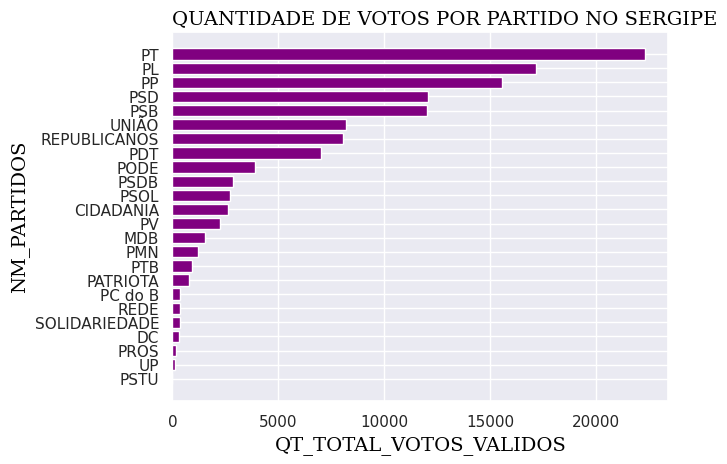

In [ ]:
#_______________________________________________________________________________________
# Acumulando os dados

lis1 = (df['SG_PARTIDO'].unique()).tolist()                                            # cria variavel com coluna SG_PARTIDO, e separa valores unicos e converte em lista
lis2 = []                                                                              # cria lista vazia
for i in range(len(lis1)):                                                             # Cria repetição de leitura na lista com SG_PARTIDO
  lis2.append(df[df.SG_PARTIDO == lis1[i]]['QT_TOTAL_VOTOS_LEG_VALIDOS'].sum())        # Calcula todos os elementos em SG_PARTIDO e atribui a lista vazia anteriormente criada
bc = dict(sorted(dict(zip(lis1 , lis2)).items(), key=lambda x:x[1], reverse=False))    # Cria um dicionário com ordem crescente, retornando uma lista de tuplas com as chaves e seus respectivos valores através do método items()

#_______________________________________________________________________________________

bd = list(bc.keys())                                                                   # Atribuir valores para nova variável
bk = list(bc.values())                                                                 # Atribuir valores para nova variável
gk = []                                                                                # Cria lista vazia
gv = []                                                                                # Cria lista vazia
soma = 0                                                                               # Define variável soma e atribui valor zero
for i in range(len(bk)):                                                               # Cria um loop de leitura
  soma = bk[i] + soma                                                                  # Atribui indice com a variável soma
for i in range(24):                                                                    # Cria um loop de leitura para os 18 maiores partidos
  gk.append(bd[i])                                                                     # Insere valores do indice a nova variavel
  gv.append(bk[i])                                                                     # Insere valores do indice a nova variavel
  soma = soma-bk[i]                                                                    # Valor da variável é subtraído na soma

#_______________________________________________________________________________________

plt.title("QUANTIDADE DE VOTOS POR PARTIDO NO SERGIPE", fontdict = fonte, loc = 'left')# Define fonte e posição do título
plt.xlabel("QT_TOTAL_VOTOS_VALIDOS", fontdict = fonte)                                 # Nome do eixo X com fonte definida
plt.ylabel("NM_PARTIDOS", fontdict = fonte)                                            # Nome d eixo Y com fonte definida
plt.barh(gk,gv, color = 'purple')                                                      # Define gráfico em pizza com cor roxa e variáveis
plt.show()                                                                             # Plota o gráfico

#_______________________________________________________________________________________

# Histograma com frequencia de votos validos no Sergipe

<Axes: xlabel='QT_TOTAL_VOTOS_VALIDOS', ylabel='Count'>

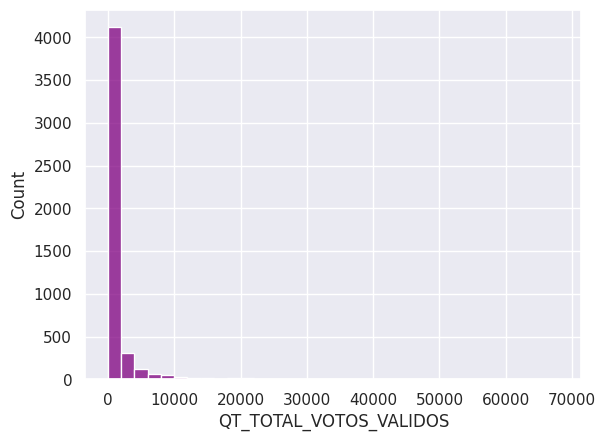

In [ ]:
#_______________________________________________________________________________________
# Histograma usando o seaborn com a quantidade de votos validos registrados na base
# Limitado em 2000 e cor roxa

sns.histplot(data = df, x = "QT_TOTAL_VOTOS_VALIDOS",  binwidth = 2000, color = 'purple')

#Gráfico de Pizza com percentual de votos por partido no Sergipe

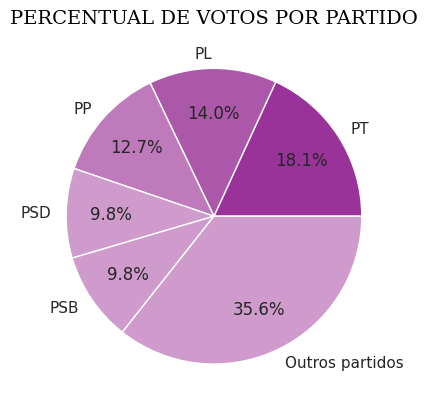

In [ ]:
#_______________________________________________________________________________________
# Acumulando os dados

pa = (df['SG_PARTIDO'].unique()).tolist()                                             # cria variavel com coluna SG_PARTIDO, e separa valores unicos e converte em lista
pb = []                                                                               # cria lista vazia
for i in range(len(pa)):                                                              # Cria repetição de leitura na lista com SG_PARTIDO
  pb.append(df[df.SG_PARTIDO == pa[i]]['QT_TOTAL_VOTOS_LEG_VALIDOS'].sum())           # Calcula todos os elementos em QT_TOTAL_VOTOS_VALIDOS e atribui a lista vazia anteriormente criada
sc = dict(sorted(dict(zip(pa , pb)).items(), key=lambda x:x[1], reverse=True))        # Cria um dicionário com ordem decrescente, retornando uma lista de tuplas com as chaves e seus respectivos valores através do método items()

#_______________________________________________________________________________________

saa = list(sc.keys())                                                                 # Atribuir valores para nova variável
sbb = list(sc.values())                                                               # Atribuir valores para nova variável
paa = []                                                                              # Cria lista vazia
pbb = []                                                                              # Cria lista vazia
soma = 0                                                                              # Define variável soma e atribui valor zero
for i in range(len(sbb)):                                                             # Cria um loop de leitura
  soma = sbb[i] + soma                                                                # Atribui indice com a variável soma
for i in range(5):                                                                    # Cria um loop de leitura
  paa.append(saa[i])                                                                  # Insere valores do indice a nova variavel
  pbb.append(sbb[i])                                                                  # Insere valores do indice a nova variavel
  soma = soma-sbb[i]                                                                  # Valor da variável é subtraído na soma

pbb.append(soma)                                                                      # Insere valor a variavel

#_______________________________________________________________________________________

mycolors = ('#993399', '#ac58aa', '#be7abb', '#cf9bcc', '#cf9bcc', '#cf9bcc')         # Define cores do gráfico
paa.append('Outros partidos')                                                         # Define legenda "outros partidos"

#_______________________________________________________________________________________

plt.pie(pbb, labels = paa, colors = mycolors, autopct='%1.1f%%', pctdistance=0.70)    # Define variáveis do gráfico, cor, trunca os percentuais e define suas posições.
plt.title("PERCENTUAL DE VOTOS POR PARTIDO", fontdict = fonte)                        # Define o título e sua fonte
plt.show()                                                                            # Plota o gráfico

# Boxplot da quantidade de votos por coligação no Sergipe

<Axes: xlabel='QT_TOTAL_VOTOS_VALIDOS', ylabel='NM_COLIGACAO'>

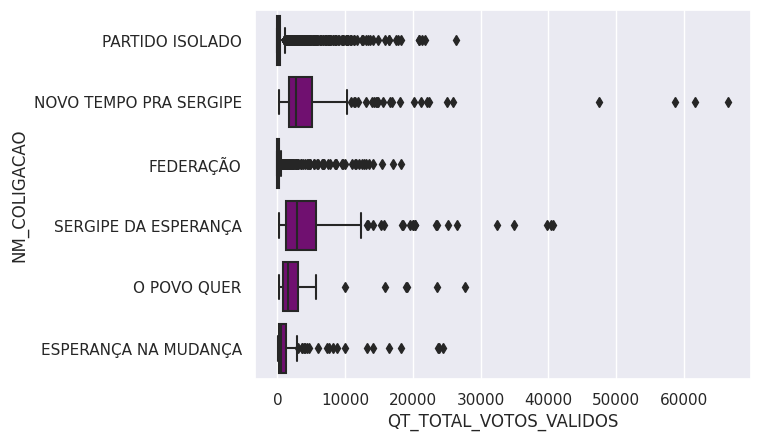

In [ ]:
#_______________________________________________________________________________________
# Usando o seaborn, plotar um histograma com as variaveis QT_TOTAL_VOTOS_VALIDOS e NM_COLIGACAO

sns.boxplot(data=df, x="QT_TOTAL_VOTOS_VALIDOS", y = "NM_COLIGACAO", color = "purple")